In [1]:
import h5py 
import scipy 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tkinter 
import scipy.interpolate 
from sklearn.neighbors import KernelDensity 
from scipy.stats import gaussian_kde 

In [ ]:
f_name_p_90 = '/Users/tongyou/Desktop/check_intensity/analyse_2/out_med_p_90.cxi' 
f_name_p_50 = '/Users/tongyou/Desktop/check_intensity/analyse_2/out_med.cxi' 

In [ ]:
# After background subtraction
fc1, ax1 = plt.subplots(4, 2, figsize = (10, 10), dpi = 300) 

f343wgas = "/Users/tongyou/Desktop/check_intensity/1/data00343gas.cxi"
f343ngas = "/Users/tongyou/Desktop/check_intensity/2/data00343nogas.cxi"
f343g = h5py.File(f343wgas, 'r')
f343ng = h5py.File(f343ngas, 'r')

f344wgas = "/Users/tongyou/Desktop/check_intensity/3/data00344gas.cxi"
f344ngas = "/Users/tongyou/Desktop/check_intensity/4/data00344nogas.cxi"
f344g = h5py.File(f344wgas, 'r')
f344ng = h5py.File(f344ngas, 'r')

f1 = f343g['/entry_1/image_1/data']
f1d = f343g['/entry_1/data_1/data']

f2 = f343ng['/entry_1/image_1/data']
f2d = f343ng['/entry_1/data_1/data']

f3 = f344g['/entry_1/image_1/data']
f3d = f344g['/entry_1/data_1/data']

f4 = f344ng['/entry_1/image_1/data']
f4d = f344ng['/entry_1/data_1/data']

# 30 nm 
f285wgas = "/Users/tongyou/Desktop/check_intensity/30nm_gas_sub/data00285subbg.cxi" 
f285g = h5py.File(f285wgas, 'r')
f5 = f285g['/entry_1/image_1/data']
f5d = f285g['/entry_1/data_1/data']
# 20 nm 
f297wgas = "/Users/tongyou/Desktop/check_intensity/20nm_gas_sub/data00297subbg.cxi" 
f297g = h5py.File(f297wgas, 'r')
f6 = f297g['/entry_1/image_1/data']
f6d = f297g['/entry_1/data_1/data']

frame = 19 
file = f6 

mean_frame = np.mean(file, axis = (1,2)) 
std_frame = np.std(file, axis = (1,2)) 
median_frame = np.median(file, axis = (1,2)) 

a0 = ax1[0,0].imshow((file[frame, :, :] - 1 * median_frame[frame]), vmax = 1000, vmin = 0) 
ax1[0,0].set(title = 'After background sub image1 ' + str(frame)) 

a1 = ax1[0,1].hist((file[frame, :, :] - 1 * median_frame[frame])) 

a2 = ax1[1,0].plot(np.arange(0,100) , mean_frame , 'rx') 
a3 = ax1[1,1].plot(np.arange(0,100) , std_frame , 'bx') 
a4 = ax1[2,0].plot(np.arange(0,100), median_frame, 'gx') 

# Close all files
f343g.close()
f343ng.close()
f344g.close()
f344ng.close()
f285g.close()
f297g.close()

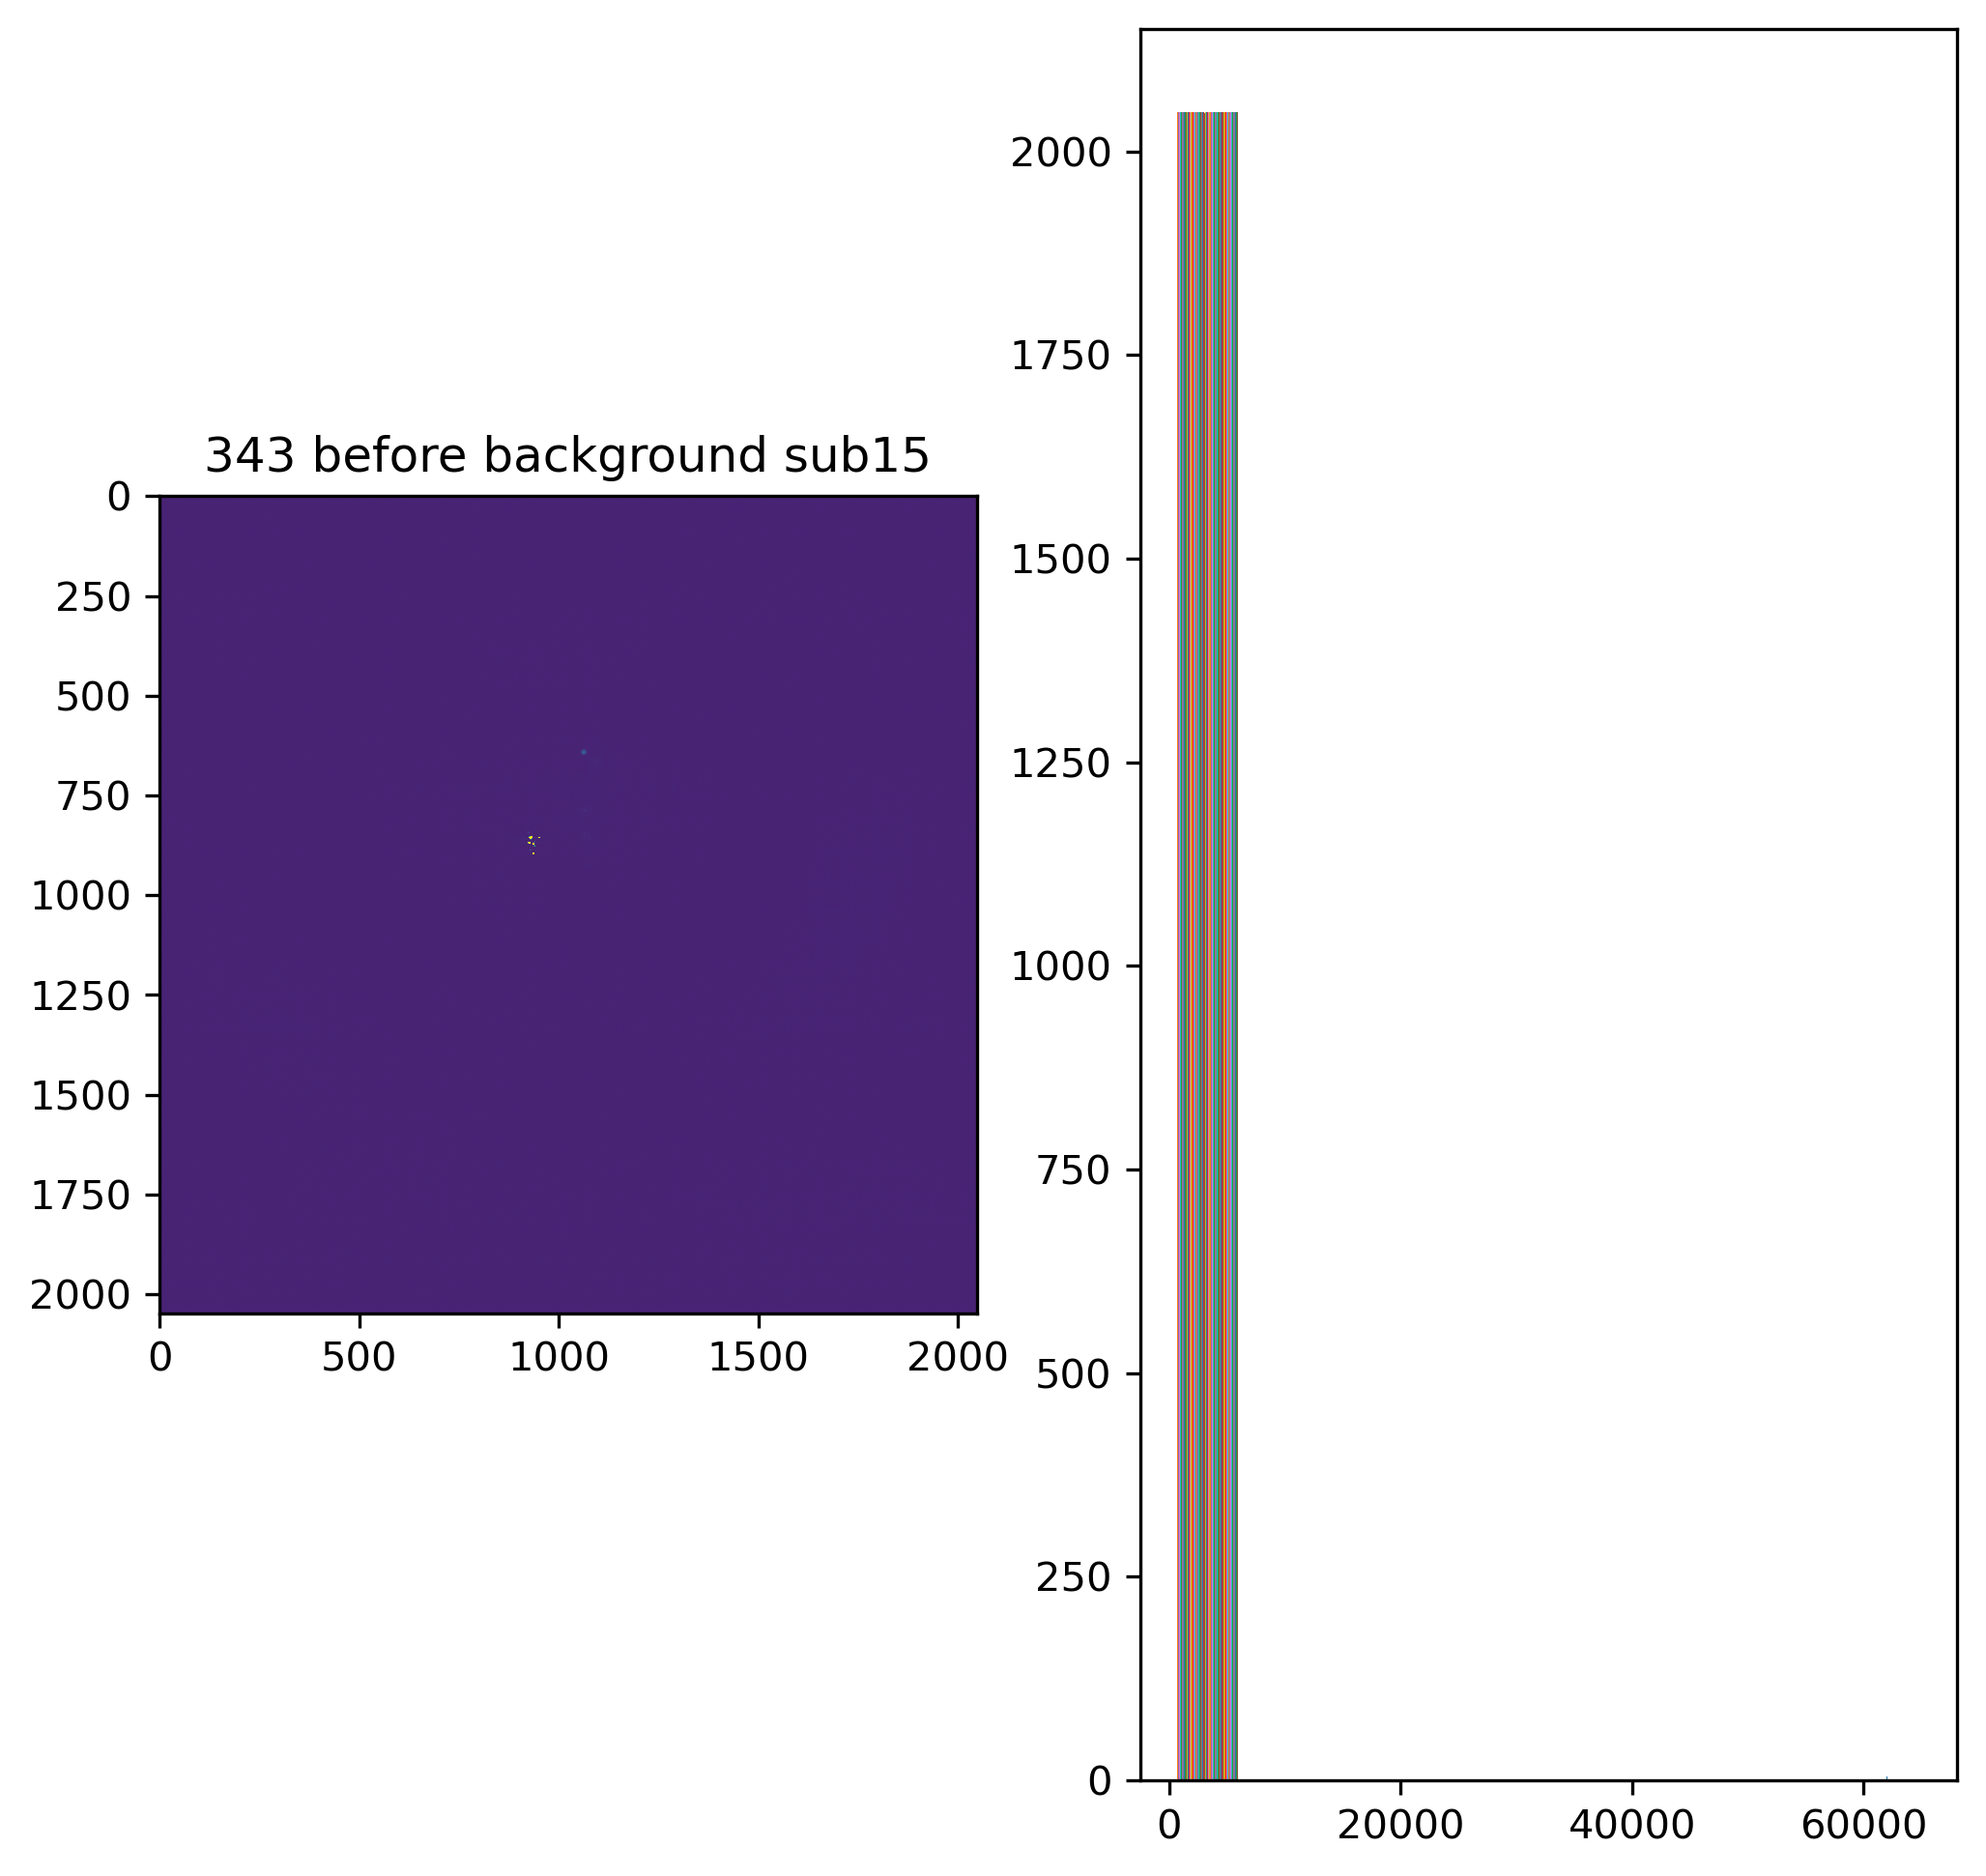

In [4]:
################################Background subtracted cxi file - real check ################################
############################################################################################################
fc, ax = plt.subplots(1, 2, figsize = (8 , 8), dpi = 300) 
### Before particle analysis ###
# Before background subtraction
f_343 = "/Users/tongyou/Desktop/check_intensity/data00343.cxi"
f_344 = "/Users/tongyou/Desktop/check_intensity/data00344.cxi"
f343 = h5py.File(f_343, 'r')
f344 = h5py.File(f_344, 'r')

f343data = f343['/entry_1/data_1/data'] # 100 x 2048 x 2048
f344data = f344['/entry_1/data_1/data']

frame = 15 # between 0 to 99 

a0 = ax[0].imshow(f343data[frame, :, :] , vmax = 1000 , vmin = 0)
ax[0].set(title = '343 before background sub' + str(frame)) 

a1 = ax[1].hist(f344data[frame, :, :])
#a1 = ax[1].imshow(f344data[frame, :, :], vmax = 1000 , vmin = 0)
#ax[1].set(title = '344 before background sub' + str(frame)) 

Root structure: <KeysViewHDF5 ['entry_1']>
Entry_1 structure: <KeysViewHDF5 ['data_1', 'image_1']>
Data_1 structure: <KeysViewHDF5 ['data', 'data_mean', 'datasq_mean']>
Image_1 structure: <KeysViewHDF5 ['data', 'data_mean', 'datasq_mean']>
Data structure: <HDF5 dataset "data": shape (100, 1024, 2048), type "<u2">
(100, 1024, 2048)


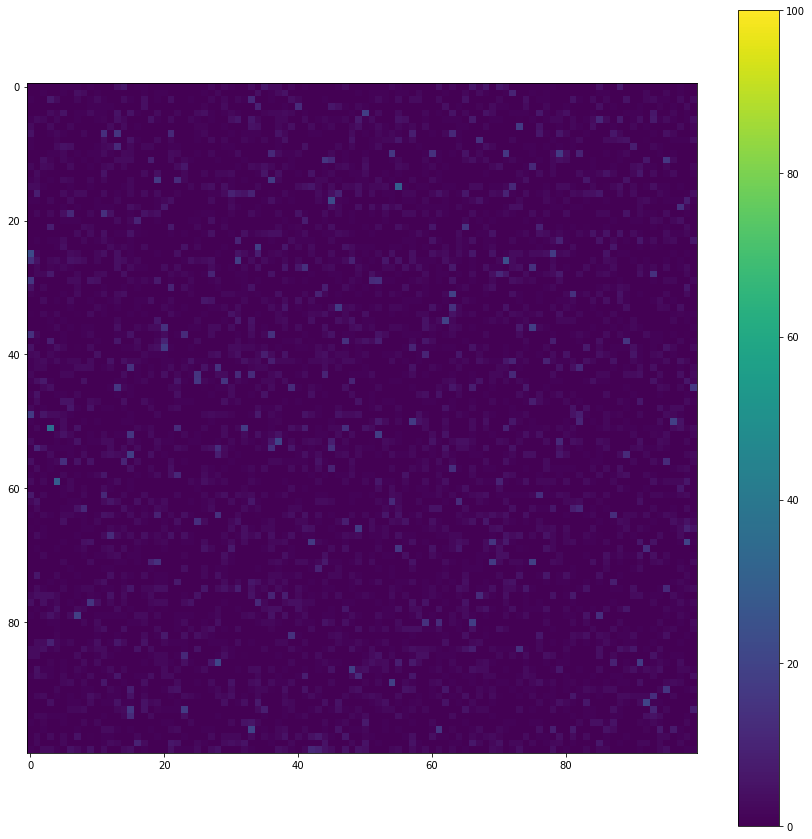

In [3]:
# File name of background cxd data file 
#bname = '/Users/tongyou/Desktop/Laser_scattering_data/analyse_test_background_subtraction_no_gas/data00323_no_gas.cxi'
#bname_w_gas = '/Users/tongyou/Desktop/Laser_scattering_data/analyse_test_background_subtraction_gas/data00322_with_gas.cxi'
#test_check = '/Users/tongyou/Desktop/Laser_scattering_data/data00325.cxi'
#w_gas = '/Users/tongyou/Desktop/Laser_scattering_data/test_subtraction_with_gas/data00322_with_gas.cxi' 
fwgs = '/Users/tongyou/Desktop/Laser_scattering_data/test_subtraction_with_gas/data00325.cxi'

background = h5py.File(fwgs, 'r') # HDF5 file 

# Background cxi file
bkeys = background.keys()
print('Root structure:', bkeys) 

# Background cxi file entry_1
bentry1keys = background['/entry_1'].keys()
print('Entry_1 structure:', bentry1keys) 

# Data cxi file data_1
fentry1keys_2 = background['/entry_1/data_1'].keys()
print('Data_1 structure:', fentry1keys_2) 

# Data cxi file image_1
fentry1keys_3 = background['/entry_1/image_1'].keys()
print('Image_1 structure:', fentry1keys_3) 

# Data cxi file data_1 data
fentry1keys_4 = background['/entry_1/data_1/data']
print('Data structure:', fentry1keys_4) 

backgroundimage = background['/entry_1/image_1/data']
print(backgroundimage.shape)

plt.figure(22, figsize = (15,15)) 
back_test = plt.imshow(backgroundimage[1, 700:800, 1100:1200] , vmax = 100, vmin = 0) 
plt.colorbar(back_test) 
background.close()

Root structure: <KeysViewHDF5 ['entry_1']>
Entry_1 structure: <KeysViewHDF5 ['data_1', 'image_1']>
Data_1 structure: <KeysViewHDF5 ['data', 'data_mean', 'datasq_mean']>
Image_1 structure: <KeysViewHDF5 []>
Data structure: <HDF5 dataset "data": shape (100, 2048, 2048), type "<u2">
Data mean structure: <HDF5 dataset "data_mean": shape (2048, 2048), type "<f8">
Data mean sq structure: <HDF5 dataset "datasq_mean": shape (2048, 2048), type "<f8">
Shape of image: (100, 2048, 2048)


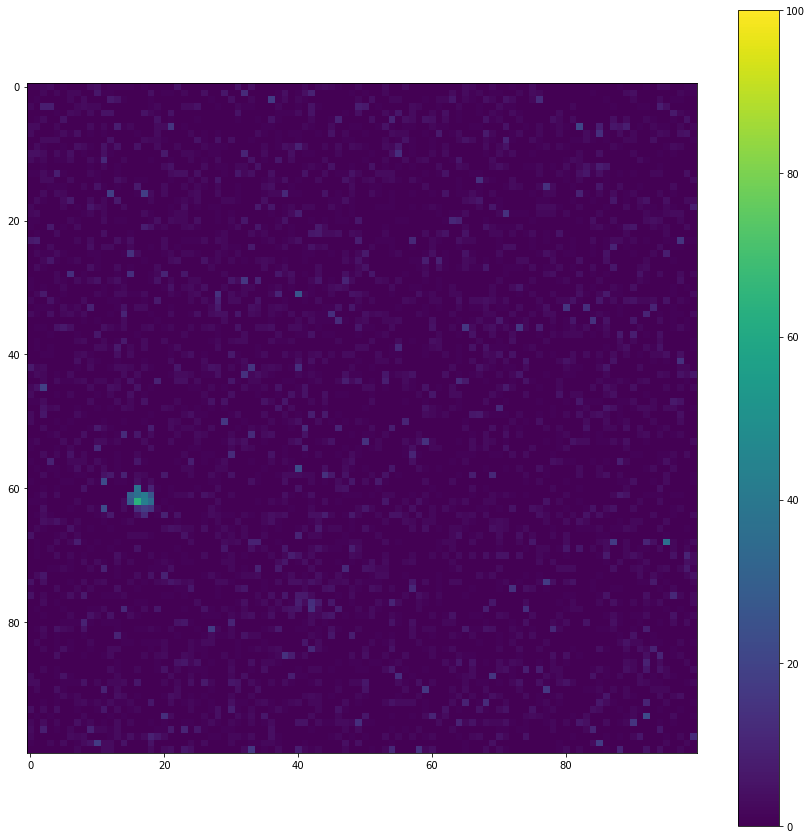

In [2]:
# File name of raw cxi data file 
fname = ('/Users/tongyou/Desktop/Laser_scattering_data/analyse_test_no_background_subtraction/data00300.cxi') # 20 nm
f = h5py.File(fname, 'r') # HDF5 file 

# Data cxi file
fkeys = f.keys()
print('Root structure:', fkeys) 

# Data cxi file entry_1
fentry1keys = f['/entry_1'].keys()
print('Entry_1 structure:',fentry1keys) 

# Data cxi file data_1
fentry1keys_2 = f['/entry_1/data_1'].keys()
print('Data_1 structure:', fentry1keys_2) 

# Data cxi file image_1
fentry1keys_3 = f['/entry_1/image_1'].keys()
print('Image_1 structure:', fentry1keys_3) 

# Data cxi file data_1 data 
fentry1keys_4 = f['/entry_1/data_1/data']
print('Data structure:', fentry1keys_4) 

# Data cxi file data_1 data mean 
fentry1keys_5 = f['/entry_1/data_1/data_mean']
print('Data mean structure:', fentry1keys_5) 

# Data cxi file data_1 datasq_mean
fentry1keys_6 = f['/entry_1/data_1/datasq_mean'] 
print('Data mean sq structure:', fentry1keys_6) 

# Raw data image 
image = f['/entry_1/data_1/data'] # shape = (frames x 2048 x 2048)
print('Shape of image:', image.shape) 

all_frames = f 

#section_mean = all_frames[10, 420:440, 420:440].mean()
#print(section_mean)
section = image[15, 700:800, 1100:1200] 
section_median = np.median(section) 
section_corrected = section - section_median 

#print(all_frames.shape)

plt.figure(20, figsize = (15,15)) 
fig_test= plt.imshow(section_corrected , vmax = 100 , vmin = 0) 
#fig_test= plt.imshow(fentry1keys_5) 
plt.colorbar(fig_test) 
f.close()